In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [3]:
filename = 'data_evaluacion.csv'
df = pd.read_csv(filename)
print (df.shape)
df.head(5)

(48841, 15)


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
# Verificar valores nulos
missing_values = df.isnull().sum()
print("Valores nulos:\n", missing_values)

Valores nulos:
 39               0
State-gov        0
77516            0
Bachelors        0
13               0
Never-married    0
Adm-clerical     0
Not-in-family    0
White            0
Male             0
2174             0
0                0
40               0
United-States    0
<=50K            0
dtype: int64


In [6]:
# Convertir columnas categóricas a variables dummy
categorical_columns = df.select_dtypes(include=['object']).columns
data_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [8]:
# Normalizar columnas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data_dummies[numeric_columns] = scaler.fit_transform(data_dummies[numeric_columns])

In [9]:
# Separar el conjunto de datos en características y etiqueta
X = data_dummies.drop(columns=['<=50K_>50K'])
y = data_dummies['<=50K_>50K']

In [10]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8352 - loss: 0.3588 - val_accuracy: 0.8521 - val_loss: 0.3159
Epoch 2/100
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8551 - loss: 0.3085 - val_accuracy: 0.8528 - val_loss: 0.3147
Epoch 3/100
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8591 - loss: 0.3065 - val_accuracy: 0.8523 - val_loss: 0.3145
Epoch 4/100
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8626 - loss: 0.3012 - val_accuracy: 0.8520 - val_loss: 0.3121
Epoch 5/100
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8634 - loss: 0.2954 - val_accuracy: 0.8533 - val_loss: 0.3111
Epoch 6/100
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8642 - loss: 0.2965 - val_accuracy: 0.8528 - val_loss: 0.3145
Epoch 7/100
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8658 - loss: 0.2915 - val_accuracy: 0.8495 - val_loss: 0.3141
Epoch 8/100
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8693 - loss: 

In [15]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Pérdida: {loss}, Precisión: {accuracy}")

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.8331 - loss: 0.5046
Pérdida: 0.49663496017456055, Precisión: 0.8331456780433655


In [27]:
# Realizar predicciones en el conjunto de prueba
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step


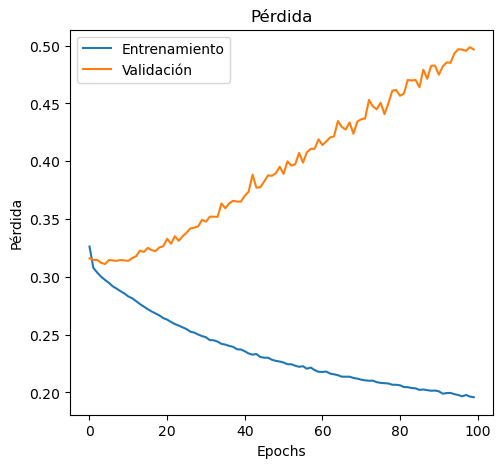

In [35]:
# Graficar la pérdida y precisión
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

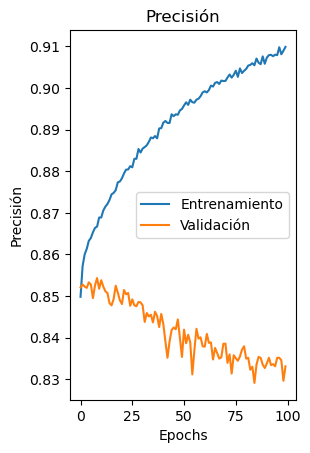

In [29]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()

plt.show()

In [30]:
# Calcular la matriz de confusión
conf_m = confusion_matrix(y_test, y_pred)
conf_m

array([[6777,  687],
       [ 943, 1362]], dtype=int64)

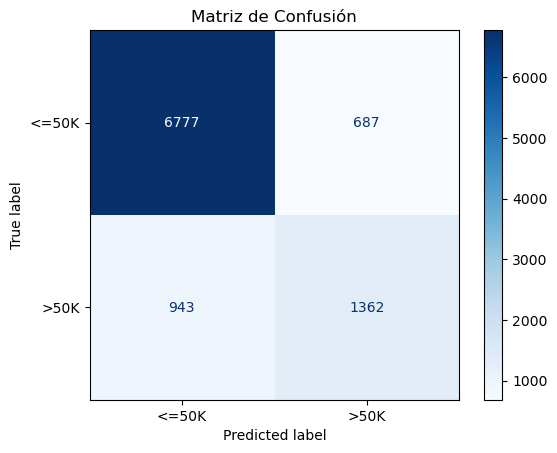

In [43]:
# Generar la gráfica de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=['<=50K', '>50K'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

In [40]:
# Reporte de clasificación
report = classification_report(y_test, y_pred, target_names=['<=50K', '>50K'])
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.89      7464
        >50K       0.66      0.59      0.63      2305

    accuracy                           0.83      9769
   macro avg       0.77      0.75      0.76      9769
weighted avg       0.83      0.83      0.83      9769

